# Proyek Analisis Data: E-Commers


## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dari e-commerce tiap bulannya berdasarkan volume dan nilai penjualan ?
- Kategori produk apakah yang memiliki volume penjualan paling tinggi dan paling rendah ?
- Bagaimana distribusi persebaran customer e-commerce ? kota dan negara bagian mana yang mempunyai jumlah customer terbanyak ?
- Bagaimana profil karakteristik dari customer e-commerce berdasarkan variabel *recency, frequency, dan monetary* ?  Kemudian bagaimana strategi yang sesuai bagi e-commerce tersebut ? 

## Menyaipkan semua library yang dibuthkan

In [131]:
# import semua library yang dibutuhkan
# Library untuk mengolah data
import numpy as np 
import pandas as pd

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

## Data Wrangling

### Gathering Data

In [132]:
# Akses directory tempat data disimpan
data_directory = "https://raw.githubusercontent.com/faishalamin123/ecommerce_data/main/data/"

# Import dataset yang digunakan dari directory
orders      = pd.read_csv(data_directory + 'orders_dataset.csv')
payments    = pd.read_csv(data_directory + 'order_payments_dataset.csv') 
reviews     = pd.read_csv(data_directory + 'order_reviews_dataset.csv')
items       = pd.read_csv(data_directory + 'order_items_dataset.csv')
category    = pd.read_csv(data_directory + 'product_category_name_translation.csv')
products    = pd.read_csv(data_directory + 'products_dataset.csv')
sellers     = pd.read_csv(data_directory + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_directory + 'geolocation_dataset.csv')
customers   = pd.read_csv(data_directory + 'customers_dataset.csv')

In [133]:
# Menyatukan dataframe kedalam dictionary
data = {'orders'  : orders,
       'payments' : payments,
       'reviews'  : reviews,
       'items'    : items,
       'category' : category,
       'products' : products,
       'sellers'  : sellers,
       'geo'      : geolocation,
       'customers': customers}

In [134]:
# Menampilkan 5 baris pertama masing-masing tabel
for df_name, df in data.items():
    print(f"\nHead for DataFrame '{df_name}':")
    display(df.head())


Head for DataFrame 'orders':


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Head for DataFrame 'payments':


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Head for DataFrame 'reviews':


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Head for DataFrame 'items':


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Head for DataFrame 'category':


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



Head for DataFrame 'products':


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Head for DataFrame 'sellers':


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Head for DataFrame 'geo':


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



Head for DataFrame 'customers':


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

#### Menilai tabel `orders` 

In [135]:
print("info tabel")
data['orders'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['orders'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['orders'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['orders'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Jumlah missing value
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
o


Jumlah duplikasi data : 0

Parameter statistik


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Berdasarkan output diatas ditemukan dua permasalahan dalam tabel `orders` meliputi :
-  Adanya missing value pada kolom : 
>*order_approved_at, order_delivered_carrier_date, order_delivered_customer_date*
-  Tipe data yang tidak sesuai pada kolom : 
>*order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date*

#### Menilai tabel `payments` 

In [136]:
print("info tabel")
data['payments'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['payments'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['payments'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['payments'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah missing value
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi data : 0

Parameter statistik


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Berdasarkan output diatas **tidak ditemukan** adanya masalah pada tabel `payments`.

#### Menilai tabel `reviews`

In [137]:
print("info tabel")
data['reviews'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['reviews'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['reviews'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['reviews'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Jumlah missing value
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64



Jumlah duplikasi data : 0

Parameter statistik


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Berdasarkan output diatas ditemukan dua permasalahan dalam tabel `reviews` meliputi :
-  Adanya missing value pada kolom : 
>review_comment_title dan review_comment_message
-  Tipe data yang tidak sesuai pada kolom : 
>review_creation_date dan review_answer_timestamp

#### Menilai tabel `items`

In [138]:
print("info tabel")
data['items'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['items'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['items'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['items'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah missing value
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi data : 0

Parameter statistik


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Berdasarkan output diatas ditemukan satu permasalahan dalam tabel `items` meliputi :
-  Tipe data yang tidak sesuai pada kolom : 
>shipping_limit_date	

#### Menilai tabel `category`

In [139]:
print("info tabel")
data['category'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['category'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['category'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['category'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Jumlah missing value
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi data : 0

Parameter statistik


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Berdasarkan output diatas **tidak ditemukan** adanya masalah pada tabel `category`.

#### Menilai tabel `products`

In [140]:
print("info tabel")
data['products'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['products'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['products'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['products'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah missing value
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_we

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Berdasarkan output diatas ditemukan satu permasalahan dalam tabel `products` meliputi :
-  Adanya missing value pada kolom : 
>product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

#### Menilai tabel `sellers`

In [141]:
print("info tabel")
data['sellers'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['sellers'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['sellers'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['sellers'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Jumlah missing value
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah duplikasi data : 0

Parameter statistik


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Berdasarkan output diatas **tidak ditemukan** adanya masalah pada tabel `sellers`.

#### Menilai tabel `geo`

In [142]:
print("info tabel")
data['geo'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['geo'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['geo'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['geo'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Jumlah missing value
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64



Jumlah duplikasi data : 261831

Parameter statistik


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Berdasarkan output diatas ditemukan satu permasalahan dalam tabel `geo` meliputi :
-  adanya duplikasi data sebanyak 261831 baris data

#### Menilai tabel `customers`

In [143]:
print("info tabel")
data['customers'].info()

print("====================================================")
print("\nJumlah missing value")
print(data['customers'].isna().sum())

print("====================================================")
print("\nJumlah duplikasi data :", data['customers'].duplicated().sum())

print("====================================================")
print("\nParameter statistik")
data['customers'].describe(include="all")

info tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah missing value
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi data : 0

Parameter statistik


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasarkan output diatas **tidak ditemukan** adanya masalah pada tabel `customers`.

### Cleaning Data

Merujuk pada hasil assessing data pada subbab sebelumnya, ditemukan adanya tiga jenis permasalahan yaitu :
- Jenis tipe data yang tidak sesuai, 
- Adanya duplikasi data, dan
- Adanya missing value.

#### Mengubah tipe data object menjadi date time
Pada bagian ini, kolom data date time yang memiliki tipe data object diubah menjadi tipe data datetime. Kemudian format penulisan data yang semula  <br>YYYY-MM-DD HH:mm:ss menjadi YYYY-MM-DD

In [144]:
# Dictionary berisi kolom tujuan yang hendak diubah tipe datanya
date_columns = {
    'orders' : ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'],
    'reviews': ['review_creation_date', 'review_answer_timestamp'],
    'items'  : ['shipping_limit_date']
}

# Loop untuk setiap dataframe dalam dictionary
for df_name, df in data.items():
    # Cek apakah ada nama tabel dalam date_columns
    if df_name in date_columns:
        # Iterasi untuk setiap kolom di dataframe
        for col in date_columns[df_name]:
            # Mengubah tipe data menjadi datetime dengan format YYYY-MM-DD
            df[col] = pd.to_datetime(df[col], errors='coerce').dt.strftime('%Y-%m-%d')
            # Mengubah kembali tipe data object menjadi datetime
            df[col] = pd.to_datetime(df[col], errors='coerce')

In [145]:
# Menampilkan kembali informasi tabel
for df_name in ['orders', 'reviews', 'items']:
    df = data[df_name]
    print(f"\nInformasi dari tabel '{df_name}' :")
    df.info()


Informasi dari tabel 'orders' :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

Informasi dari tabel 'reviews' :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 

Merujuk pada output tersebut dapat dilihat bahwa tipe data pada kolom tujuan sudah berubah menjadi datetime.

#### Menghilangkan duplikasi data

In [146]:
# Menghilangkan duplikasi data pada dataframe geo
data['geo'].drop_duplicates(inplace=True)

# Menampilkan ulang kondisi dataframe geo
data['geo'].info()
print("\nJumlah duplikasi data pada dataframe geo :", data['geo'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB

Jumlah duplikasi data pada dataframe geo : 0


In [147]:
data['geo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


Terlihat pada tabel tersebut masih terdapat duplikasi pada kolom geolocation_zip_code_prefix. Maka perlu dilakukan pengambilan baris pertama dan menghapus baris duplikat. 

In [148]:
# Menghilangkan duplikat berdasarkan kolom 'geolocation_zip_code_prefix'
data['geo'] = data['geo'].drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')
data['geo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


#### Mengatasi missing value
Dataframe yang mempunyai missing value meliputi :
- orders = order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- reviews = review_comment_title dan review_comment_message
- products = product_category_name, product_name_lenght, product_description_lenght, product_photos_qty	

In [149]:
# Menampilkan dataframe dengan missing values
for df_name, df in data.items():
    missing_values = df[df.isna().any(axis=1)]
    print(f"\nMissing values pada dataframe '{df_name}'")
    display(missing_values)


Missing values pada dataframe 'orders'


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05,2018-06-05,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11,2018-01-11,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15



Missing values pada dataframe 'payments'


,order_id,payment_sequential,payment_type,payment_installments,payment_value



Missing values pada dataframe 'reviews'


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02



Missing values pada dataframe 'items'


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value



Missing values pada dataframe 'category'


,product_category_name,product_category_name_english



Missing values pada dataframe 'products'


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0



Missing values pada dataframe 'sellers'


,seller_id,seller_zip_code_prefix,seller_city,seller_state



Missing values pada dataframe 'geo'


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state



Missing values pada dataframe 'customers'


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


Penanganan missing values pada ketiga dataframe tersebut dilakukan sebagai berikut :
1. Dataframe orders
>Jumlah missing values cukup banyak, sehingga jika dilakukan dropping rows akan menghilangkan banyak informasi. Nilai dari kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date merupakan nilai yang tidak bisa diubah dikarenakan berhubungan dengan value dari kolom order_status.

2. Dataframe reviews
>Jumlah missing values cukup banyak, sehingga opsi dropping rows akan menghilangkan banyak informasi penting. Kolom tersebut kosong menunjukkan bahwa customers tidak mengisi kolom tersebut pada saat memberikan review. Sehingga missing value pada kolom review_comment_title akan diisi dengan "no comment title" sedangkan missing value pada kolom review_comment_message akan diisi dengan "no comment message".

3. Dataframe products
>Jumlah missing value cukup sedikit serta tidak terdapat data lain yang dapat membantu mengisi missing value tersebut. sehingga missing value pada kolom product_category_name akan diisi dengan others. Sedangkan kolom lain yang masih memiliki missing values akan diabaikan.

##### Mengatasi missing values pada `reviews`

In [150]:
# Mengganti missing values pada kolom 'review_comment_title' dengan "no comment title"
data['reviews']['review_comment_title'].fillna("no comment title", inplace=True)

# Mengganti missing values pada kolom 'review_comment_message' dengan "no comment message"
data['reviews']['review_comment_message'].fillna("no comment message", inplace=True)

# Menampilkan hasil
data['reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment title,no comment message,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment title,no comment message,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment title,no comment message,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,no comment title,no comment message,2018-07-07,2018-07-14
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,no comment title,no comment message,2017-12-09,2017-12-11
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,no comment title,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,no comment title,no comment message,2018-07-01,2018-07-02


##### Mengatasi missing values pada `products`

In [151]:
# Pertama kita akan mengganti kolom products['product_category_name'] dengan kolom category['product_category_name_english']
# Melakukan merge berdasarkan kolom product_category_name
merged_products = pd.merge(data['products'], data['category'], how='left', on='product_category_name')

# Mengganti kolom product_category_name dengan product_category_name_english
merged_products['product_category_name'] = merged_products['product_category_name_english']

# Menghapus kolom product_category_name_english yang sudah tidak diperlukan
merged_products = merged_products.drop(columns=['product_category_name_english'])

# Menyimpan DataFrame yang sudah diubah kembali ke dalam dictionary
data['products'] = merged_products

In [152]:
# Mengganti missing values pada kolom 'product_category_name' dengan "others"
data['products']['product_category_name'].fillna("others", inplace=True)

# Menampilkan hasil
others_name = data['products'][data['products']['product_category_name']=='others']
display(others_name.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,others,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,others,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,others,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,others,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,others,NaN,NaN,NaN,300.0,35.0,7.0,12.0


## Exploratory Data Analysis (EDA)

### Explore `orders`

In [153]:
# Menghitung jumlah pelanggan unik berdasarkan status pesanan
customer_orders_counts = data['orders'].groupby(by='order_status').customer_id.nunique().sort_values(ascending=False).reset_index()

# Menghitung persentase dari total
total_customers = data['orders']['customer_id'].nunique()
customer_orders_counts['percentage'] = (customer_orders_counts['customer_id'] / total_customers) * 100

# Menampilkan hasil
display(customer_orders_counts)

,order_status,customer_id,percentage
0,delivered,96478,97.020344
1,shipped,1107,1.113223
2,canceled,625,0.628513
3,unavailable,609,0.612423
4,invoiced,314,0.315765
5,processing,301,0.302692
6,created,5,0.005028
7,approved,2,0.002011


Hanya terdapat 2.98% transaksi yang tidak terselesaikan. Dalam analisis selanjutnya akan berfokus pada transaksi dengan status delivered saja atau transaksi yang telah sepenuhnya terselesaikan.

In [154]:
# Membuat DataFrame baru dengan hanya baris yang memiliki status "delivered"
delivered_orders_df = data['orders'].query("order_status == 'delivered'").copy()

# Menampilkan DataFrame baru
display(delivered_orders_df.head())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


### Explore `payments`

In [155]:
data['payments'].describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


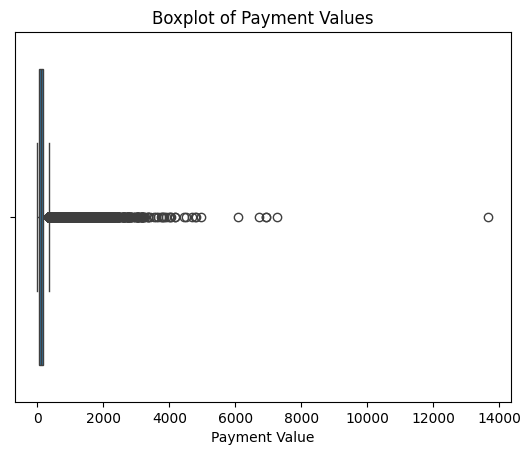

In [156]:
# Membuat boxplot menggunakan Seaborn
sns.boxplot(x=data['payments']['payment_value'])
plt.title('Boxplot of Payment Values')
plt.xlabel('Payment Value')
plt.show()

In [157]:
# Menampilkan pivot table jumlah penjualan dan nilai yang dibayarkan
data['payments'].groupby(by='payment_type').agg({
    "order_id"      : "nunique",
    "payment_value" : ["sum", "max", "min", "mean", "std"]
})

order_id payment_value                                         
              nunique           sum       max    min        mean         std
payment_type                                                                
boleto          19784    2869361.27   7274.88  11.62  145.034435  213.581061
credit_card     76505   12542084.19  13664.08   0.01  163.319021  222.119311
debit_card       1528     217989.79   4445.50  13.38  142.570170  245.793401
not_defined         3          0.00      0.00   0.00    0.000000    0.000000
voucher          3866     379436.87   3184.34   0.00   65.703354  115.519185

Nilai dari payment_value merupakan nilai hasil penjumlahan antara harga barang (price) dengan biaya pengiriman (freight_value).

### Explore `reviews`

In [158]:
# Menghitung jumlah pelanggan unik berdasarkan review score
customer_reviews_counts = data['reviews'].groupby(by='review_score').order_id.nunique().reset_index()

# Menghitung persentase dari total
total_order = data['reviews']['order_id'].nunique()
customer_reviews_counts['percentage'] = (customer_reviews_counts['order_id'] / total_order) * 100

# Menampilkan hasil
display(customer_reviews_counts)

,review_score,order_id,percentage
0,1,11393,11.546218
1,2,3148,3.190336
2,3,8160,8.269739
3,4,19098,19.354839
4,5,57076,57.843584


### Explore `items`

In [159]:
data['items'].describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 02:28:41.480692480,120.653739,19.990320
min,1.000000,2016-09-19 00:00:00,0.850000,0.000000
25%,1.000000,2017-09-20 00:00:00,39.900000,13.080000
50%,1.000000,2018-01-26 00:00:00,74.990000,16.260000
75%,1.000000,2018-05-10 00:00:00,134.900000,21.150000
max,21.000000,2020-04-09 00:00:00,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


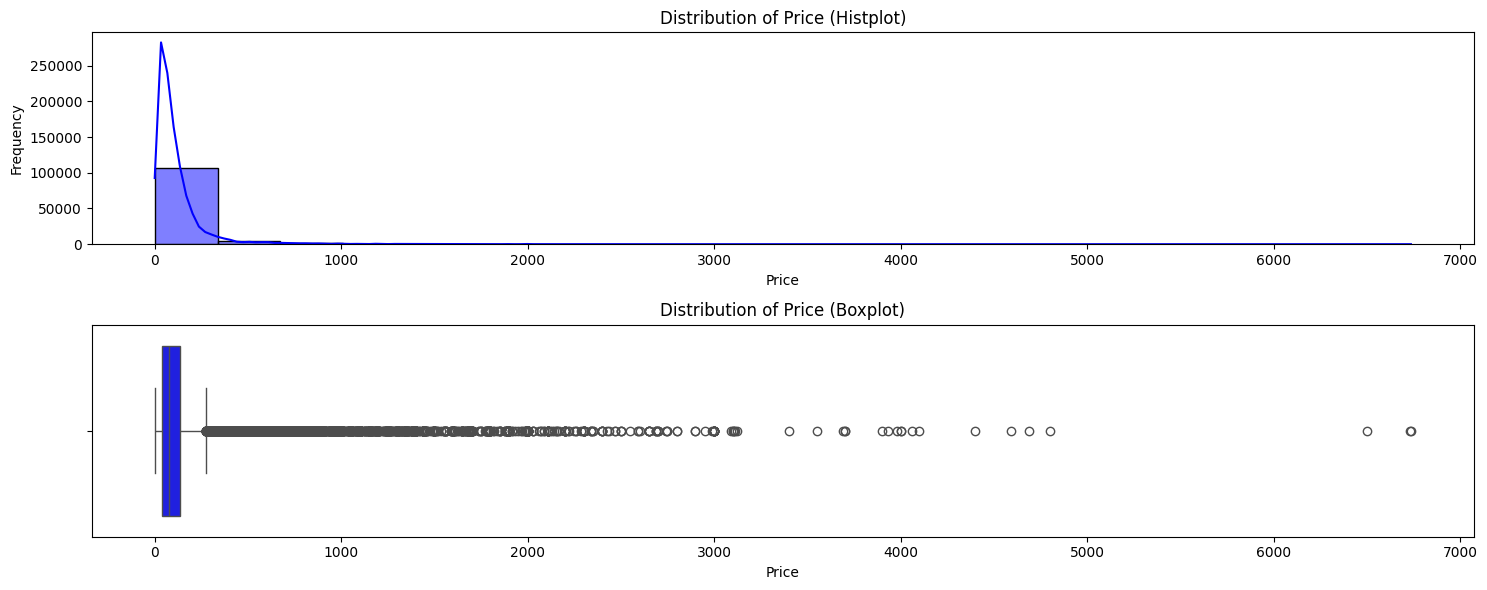

In [160]:
# Menggunakan Subplot untuk Menampilkan Histplot dan Boxplot
fig, axes = plt.subplots(nrows=2, figsize=(15, 6))

# Histplot
sns.histplot(data['items']['price'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Price (Histplot)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=data['items']['price'], color='blue', ax=axes[1])
axes[1].set_title('Distribution of Price (Boxplot)')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

Meskipun distribusi dari data price menunjukkan terdapat banyak outlier pada sisi kanan boxplot, namun outlier tersebut merepresentasikan terdapat beberapa transaksi penjualan dengan nilai yang besar. Sehingga outlier tidak dihilangkan.
Untuk mempermudah dalam melakukan analisis distribusi harag, data akan dibagi kedalam 3 kategori berdasarkan kolom *price* yaitu :
- Low Tier  = harga dibawah rata-rata
- Mid Tier  = harga diatas rata-rata dan dibawah IQR
- High Tier = harga diatas IQR

In [161]:
# Menghitung rata-rata dan batas atas box plot
mean_price  = data['items']['price'].mean()
upper_limit = data['items']['price'].quantile(0.75) + 1.5 * (data['items']['price'].quantile(0.75) - data['items']['price'].quantile(0.25))

# Membuat kolom kelas harga
data['items']['price_class'] = pd.cut(
    data['items']['price'],
    bins=[float('-inf'), mean_price, upper_limit, float('inf')],
    labels=['Low Tier', 'Mid Tier', 'High Tier']
)

# Menampilkan hasil
display(data['items'][['price', 'price_class']].head(10))

,price,price_class
0,58.90,Low Tier
1,239.90,Mid Tier
2,199.00,Mid Tier
3,12.99,Low Tier
4,199.90,Mid Tier
5,21.90,Low Tier
6,19.90,Low Tier
7,810.00,High Tier
8,145.95,Mid Tier
9,53.99,Low Tier


In [162]:
# Membuat pivot table berdasarkan price_class
price_class_table = data['items'].groupby(by='price_class').agg({
    "order_id" : "nunique",
    "price"    : ['sum', 'max', 'min', 'mean']
}).reset_index()

display(price_class_table)

C:\Users\Faisal\AppData\Local\Temp\ipykernel_15324\3489000477.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_class_table = data['items'].groupby(by='price_class').agg({


price_class order_id       price                            
               nunique         sum     max     min        mean
0    Low Tier    69221  4641549.18   120.5    0.85   57.643243
1    Mid Tier    21920  4110542.68   277.3  120.70  173.433302
2   High Tier     8055  4839551.84  6735.0  277.45  574.291188

### Explore `items` dan `products`

In [163]:
# Menggabungkan tabel data['items'] dengan data['products']
items_products_df = pd.merge(
    data['items'],
    data['products'],
    how='left',
    on='product_id')

# Menampilkan hasil merge
items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_class,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,Low Tier,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,Mid Tier,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,Mid Tier,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,Low Tier,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,Mid Tier,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [164]:
# Membuat pivot table product_id berdasarkan order_id dan price
product_sale = items_products_df.groupby(by='product_id').agg({
    "order_id" : "nunique",
    "price"    : ["sum", "max", "min", "mean", "std" ]
})

# Menambahkan kolom modus
product_sale[('price', 'mode')] = items_products_df.groupby('product_id')['price'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Mengurutkan pivot table berdasarkan jumlah penjualan
product_sale = product_sale.sort_values(by=('order_id','nunique'),ascending=False).reset_index()
display(product_sale)

product_id order_id     price                  \
                                         nunique       sum     max     min   
0      99a4788cb24856965c36a24e339b6058      467  43025.56   89.90   74.00   
1      aca2eb7d00ea1a7b8ebd4e68314663af      431  37608.90  109.90   69.90   
2      422879e10f46682990de24d770e7f83d      352  26577.22   59.90   49.00   
3      d1c427060a0f73f6b889a5c7c61f2ac4      323  47214.51  189.99  109.99   
4      389d119b48cf3043d311335e499d9c6b      311  21440.59   59.90   49.00   
...                                 ...      ...       ...     ...     ...   
32946  69c58bb97c8d7b75fad9e6c1d391fda6        1    105.30  105.30  105.30   
32947  69c3a9ec3f1094ad11505df27ddad569        1     69.50   69.50   69.50   
32948  69c2f05e34d543dc71cfe745bfac8499        1     89.90   89.90   89.90   
32949  69c2cca014581e7e3756142963a69313        1    129.00  129.00  129.00   
32950  fffe9eeff12fcbd74a2f2b007dde0c58        1    249.99  249.99  249.99   

                                      
             mean        std    mode  
0       88.167131   3.489328   89.90  
1       71.364137   3.670723   69.90  
2       54.911612   4.372601   59.90  
3      137.651633  17.136725  119.00  
4       54.695383   4.524637   59.90  
...           ...        ...     ...  
32946  105.300000        NaN  105.30  
32947   69.500000        NaN   69.50  
32948   89.900000        NaN   89.90  
32949  129.000000        NaN  129.00  
32950  249.990000        NaN  249.99  

[32951 rows x 8 columns]

In [165]:
# Membuat pivot table product_category_name berdasarkan order_id dan price
category_sale = items_products_df.groupby(by='product_category_name').agg({
    "order_id" : "nunique",
    "price"    : ["sum", "max", "min", "mean", "std" ]
})

# Menambahkan kolom modus
category_sale[('price', 'mode')] = items_products_df.groupby('product_category_name')['price'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Mengurutkan pivot table berdasarkan jumlah penjualan
category_sale = category_sale.sort_values(by=('order_id','nunique'),ascending=False).reset_index()
display(category_sale)

product_category_name order_id       price                   \
                               nunique         sum      max     min   
0              bed_bath_table     9417  1036988.68  1999.98    6.99   
1               health_beauty     8836  1258681.34  3124.00    1.20   
2              sports_leisure     7720   988048.97  4059.00    4.50   
3       computers_accessories     6689   911954.32  3699.99    3.90   
4             furniture_decor     6449   729762.49  1899.00    4.90   
..                        ...      ...         ...      ...     ...   
67      arts_and_craftmanship       23     1814.01   289.49    9.80   
68                 la_cuisine       13     2054.99   389.00   24.00   
69          cds_dvds_musicals       12      730.00    65.00   45.00   
70  fashion_childrens_clothes        8      569.85   110.00   39.99   
71      security_and_services        2      283.29   183.29  100.00   

                                    
          mean         std    mode  
0    93.296327   82.128028   89.90  
1   130.163531  179.499147   29.90  
2   114.344285  162.471635   69.90  
3   116.513903  169.974919  149.90  
4    87.564494   88.832037   69.90  
..         ...         ...     ...  
67   75.583750   73.997815  129.49  
68  146.785000   79.373941  137.00  
69   52.142857    9.944903   45.00  
70   71.231250   31.831886   39.99  
71  141.645000   58.894924  100.00  

[72 rows x 8 columns]

Merujuk pada output dua pivot table diatas dapat ditarik kesimpulan :
>Jumlah penjualan yang tinggi tidak selalu menggambarkan nilai penjualan yang tinggi pula. Terlihat meski terdapat produk atau kategori produk dengan jumlah penjualan yang tinggi ada kalanya nilai penjualan produk atau kategori produk tersebut lebih rendah dibandingkan dengan produk lainnya yang memiliki jumlah penjualan lebih rendah.

In [166]:
# Membuat dataframe baru dengan nama category_sales
category_sales = items_products_df.groupby('product_category_name')['order_id'].nunique().reset_index(name='sales_volume')

# Mengurutkan DataFrame dari yang paling tinggi ke rendah berdasarkan sales_volume
category_sales = category_sales.sort_values(by='sales_volume', ascending=False)
category_sales

,product_category_name,sales_volume
7,bed_bath_table,9417
43,health_beauty,8836
66,sports_leisure,7720
15,computers_accessories,6689
39,furniture_decor,6449
...,...,...
3,arts_and_craftmanship,23
52,la_cuisine,13
11,cds_dvds_musicals,12
29,fashion_childrens_clothes,8


### Explore `items_products_df` dan `review`

In [167]:
# Menggabungkan tabel 'items_products_df' dengan data['review']
items_products_reviews_df = pd.merge(
    items_products_df,
    data['reviews'],
    how='left',
    on='order_id')

# Menampilkan hasil merge
items_products_reviews_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_class,product_category_name,product_name_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,Low Tier,cool_stuff,58.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,no comment title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,Mid Tier,pet_shop,56.0,...,30000.0,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4.0,no comment title,no comment message,2017-05-13,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,Mid Tier,furniture_decor,59.0,...,3050.0,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,no comment title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,Low Tier,perfumery,42.0,...,200.0,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4.0,no comment title,no comment message,2018-08-15,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,Mid Tier,garden_tools,59.0,...,3750.0,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5.0,no comment title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03


In [168]:
# Membuat pivot table product_id berdasarkan order_id dan price
review_sale = items_products_reviews_df.groupby(by='review_score').agg({
    "order_id" : "nunique",
    "price"    : ["sum", "max", "min", "mean", "std" ]
})

# Menambahkan kolom modus
review_sale[('price', 'mode')] = items_products_reviews_df.groupby('review_score')['price'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Mengurutkan pivot table berdasarkan jumlah penjualan
review_sale = review_sale.sort_values(by='review_score',ascending=False).reset_index()
display(review_sale)

review_score order_id       price                                         \
                nunique         sum      max   min        mean         std   
0          5.0    57006  7700489.39  6735.00  0.85  121.219825  184.449708   
1          4.0    19065  2528015.01  4690.00  0.85  118.602628  177.685858   
2          3.0     8107  1037092.59  2899.00  3.06  110.059704  141.293600   
3          2.0     3086   448799.56  3999.00  5.31  115.849138  178.344045   
4          1.0    10854  1812828.22  3109.99  0.85  127.350068  202.053841   

         
   mode  
0  59.9  
1  59.9  
2  59.9  
3  49.9  
4  59.9

### Explore `items_products_reviews_df` dan `delivered_orders_df`

In [169]:
# Menggabungkan tabel 'items_products_reviews_df' dengan data['orders']
orders_df = pd.merge(
    items_products_reviews_df,
    delivered_orders_df,
    how='left',
    on='order_id')

# Menampilkan hasil merge
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_class,product_category_name,product_name_lenght,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,Low Tier,cool_stuff,58.0,...,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,2017-09-19,2017-09-20,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,Mid Tier,pet_shop,56.0,...,no comment message,2017-05-13,2017-05-15,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,2017-04-26,2017-05-04,2017-05-12,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,Mid Tier,furniture_decor,59.0,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,2018-01-14,2018-01-16,2018-01-22,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,Low Tier,perfumery,42.0,...,no comment message,2018-08-15,2018-08-15,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,2018-08-08,2018-08-10,2018-08-14,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,Mid Tier,garden_tools,59.0,...,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,2017-02-04,2017-02-16,2017-03-01,2017-03-17


In [170]:
# Membuat dataframe baru dengan nama monthly_sales
monthly_sales = pd.DataFrame()

# Mengekstrak bulan dan tahun dari order_purchase_timestamp
orders_df['month'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M')

# Mengisi kolom month dengan nilai unik dan mengurutkannya
unique_months = orders_df['month'].sort_values().unique()
monthly_sales['month'] = unique_months

# Mengubah tipe data kolom "month" menjadi datetime dengan format 'YYYY-MM'
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'].astype(str))

# Menghitung jumlah penjualan per bulan
monthly_sales['sales_volume'] = orders_df.groupby('month')['order_id'].count().reindex(unique_months, fill_value=0).values

# Menghitung nilai penjualan per bulan
monthly_sales['sales_value'] = orders_df.groupby('month')['price'].sum().reindex(unique_months, fill_value=0).values

# Menghapus baris dengan nilai NaT
monthly_sales = monthly_sales.dropna(subset=['month'])

# Menampilkan hasil
display(monthly_sales)

,month,sales_volume,sales_value
0,2016-09-01,3,134.97
1,2016-10-01,317,40451.80
2,2016-12-01,1,10.90
3,2017-01-01,924,112573.39
4,2017-02-01,1869,235483.40
5,2017-03-01,2917,360865.25
6,2017-04-01,2577,341209.62
7,2017-05-01,4048,492620.44
8,2017-06-01,3524,425387.66
9,2017-07-01,4460,484637.74


Terlihat bahwa terdapat bulan yang hilang, yaitu 2016-11-01. Maka saya akan menambahkan bulan tersebut dengan anggapan pada bulan tersebut tidak terdapat transaksi.

In [171]:
# Menambahkan data baru pada bulan 2016-11-01
new_data = pd.DataFrame({'month': [pd.to_datetime('2016-11-01')],
                         'sales_volume': [0],
                         'sales_value': [0]})

# Menyisipkan data baru pada posisi indeks 2
monthly_sales = pd.concat([monthly_sales.iloc[:2], new_data, monthly_sales.iloc[2:]]).reset_index(drop=True)
display(monthly_sales)

,month,sales_volume,sales_value
0,2016-09-01,3,134.97
1,2016-10-01,317,40451.80
2,2016-11-01,0,0.00
3,2016-12-01,1,10.90
4,2017-01-01,924,112573.39
5,2017-02-01,1869,235483.40
6,2017-03-01,2917,360865.25
7,2017-04-01,2577,341209.62
8,2017-05-01,4048,492620.44
9,2017-06-01,3524,425387.66


### Explore `customers`, `geo` dan `orders_df`

In [172]:
# Menggabungkan tabel data['customers'] dan orders_df
order_customers_df = pd.merge(
    orders_df,
    data['customers'],
    how='left',
    on='customer_id')

# Menampilkan hasil merge
order_customers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_class,product_category_name,product_name_lenght,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,Low Tier,cool_stuff,58.0,...,2017-09-13,2017-09-13,2017-09-19,2017-09-20,2017-09-29,2017-09,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,Mid Tier,pet_shop,56.0,...,2017-04-26,2017-04-26,2017-05-04,2017-05-12,2017-05-15,2017-04,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,Mid Tier,furniture_decor,59.0,...,2018-01-14,2018-01-14,2018-01-16,2018-01-22,2018-02-05,2018-01,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,Low Tier,perfumery,42.0,...,2018-08-08,2018-08-08,2018-08-10,2018-08-14,2018-08-20,2018-08,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,Mid Tier,garden_tools,59.0,...,2017-02-04,2017-02-04,2017-02-16,2017-03-01,2017-03-17,2017-02,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [173]:
# Buat DataFrame baru (geo_df) dengan hanya kolom yang dipilih
selected_columns = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
geo_df = data['geo'][selected_columns].copy()

# Menggabungkan tabel orders_customers_df dan geo_df
all_data = pd.merge(
    order_customers_df,
    geo_df,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

# Menampilkan hasil merge
all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_class,product_category_name,product_name_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,Low Tier,cool_stuff,58.0,...,2017-09-20,2017-09-29,2017-09,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,28013.0,-21.758076,-41.312633
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,Mid Tier,pet_shop,56.0,...,2017-05-12,2017-05-15,2017-04,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,15775.0,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,Mid Tier,furniture_decor,59.0,...,2018-01-22,2018-02-05,2018-01,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,35661.0,-19.860439,-44.597972
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,Low Tier,perfumery,42.0,...,2018-08-14,2018-08-20,2018-08,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,12952.0,-23.144923,-46.539830
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,Mid Tier,garden_tools,59.0,...,2017-03-01,2017-03-17,2017-02,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,13226.0,-23.249008,-46.824961


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dari e-commerce tiap bulannya berdasarkan volume dan nilai penjualan ?

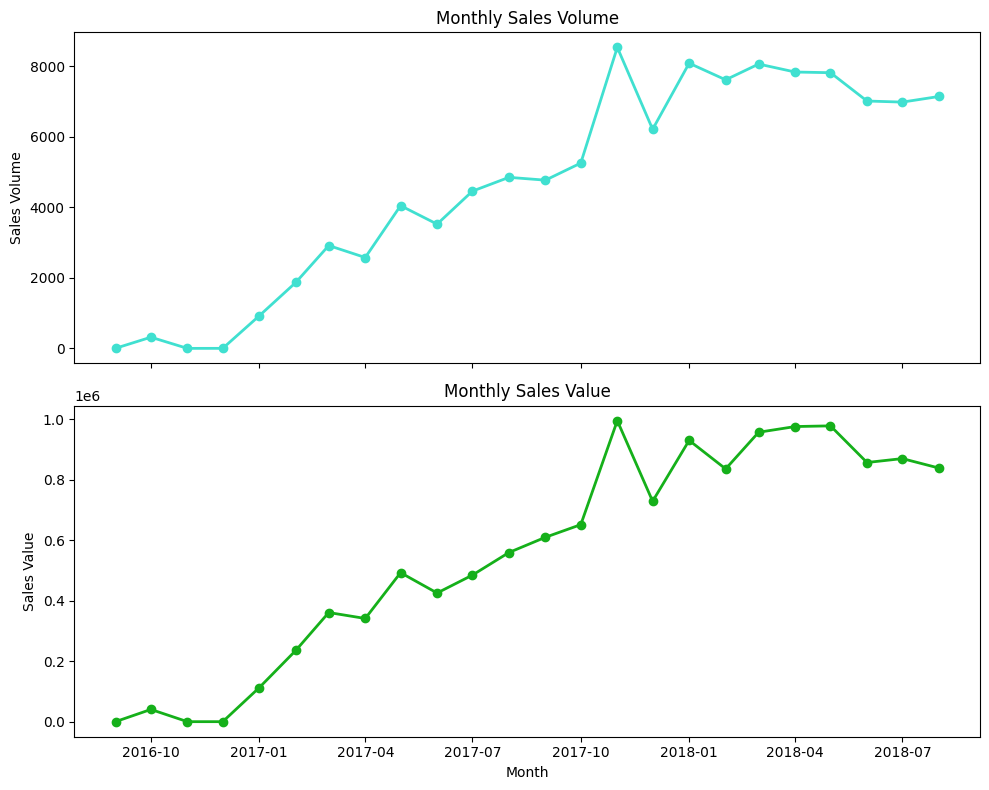

In [176]:
# Membuat dua subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Subplot pertama: Sales Volume
axes[0].plot(
    monthly_sales['month'],
    monthly_sales['sales_volume'],
    marker='o', 
    linewidth=2,
    color='turquoise'
)
axes[0].set_ylabel('Sales Volume')
axes[0].set_title('Monthly Sales Volume')

# Subplot kedua: Sales Value
axes[1].plot(
    monthly_sales['month'],
    monthly_sales['sales_value'],
    marker='o', 
    linewidth=2,
    color='#15B01A'
)
axes[1].set_ylabel('Sales Value')
axes[1].set_xlabel('Month')
axes[1].set_title('Monthly Sales Value')

# Menambahkan label dan judul
plt.tight_layout()
plt.show()

Performa e-commerce dilihat dari jumlah penjualan dan nilai penjualan setiap bulannya menunjukkan adanya tren positif. Namun pada tiga bulan terakhir (juni - agustus), nilai penjualan mengalami penurunan nilai dibanding bulan bulan sebelumnya (maret - mei). Sedangkan jumlah penjualan pada tiga bulan terakhir (juni - agustus) juga mengalami penurunan dibanding bulan mei, namun tidak separah penurunan nilai penjualan.

### Pertanyaan 2: Kategori produk apakah yang memiliki volume penjualan paling tinggi dan paling rendah ?

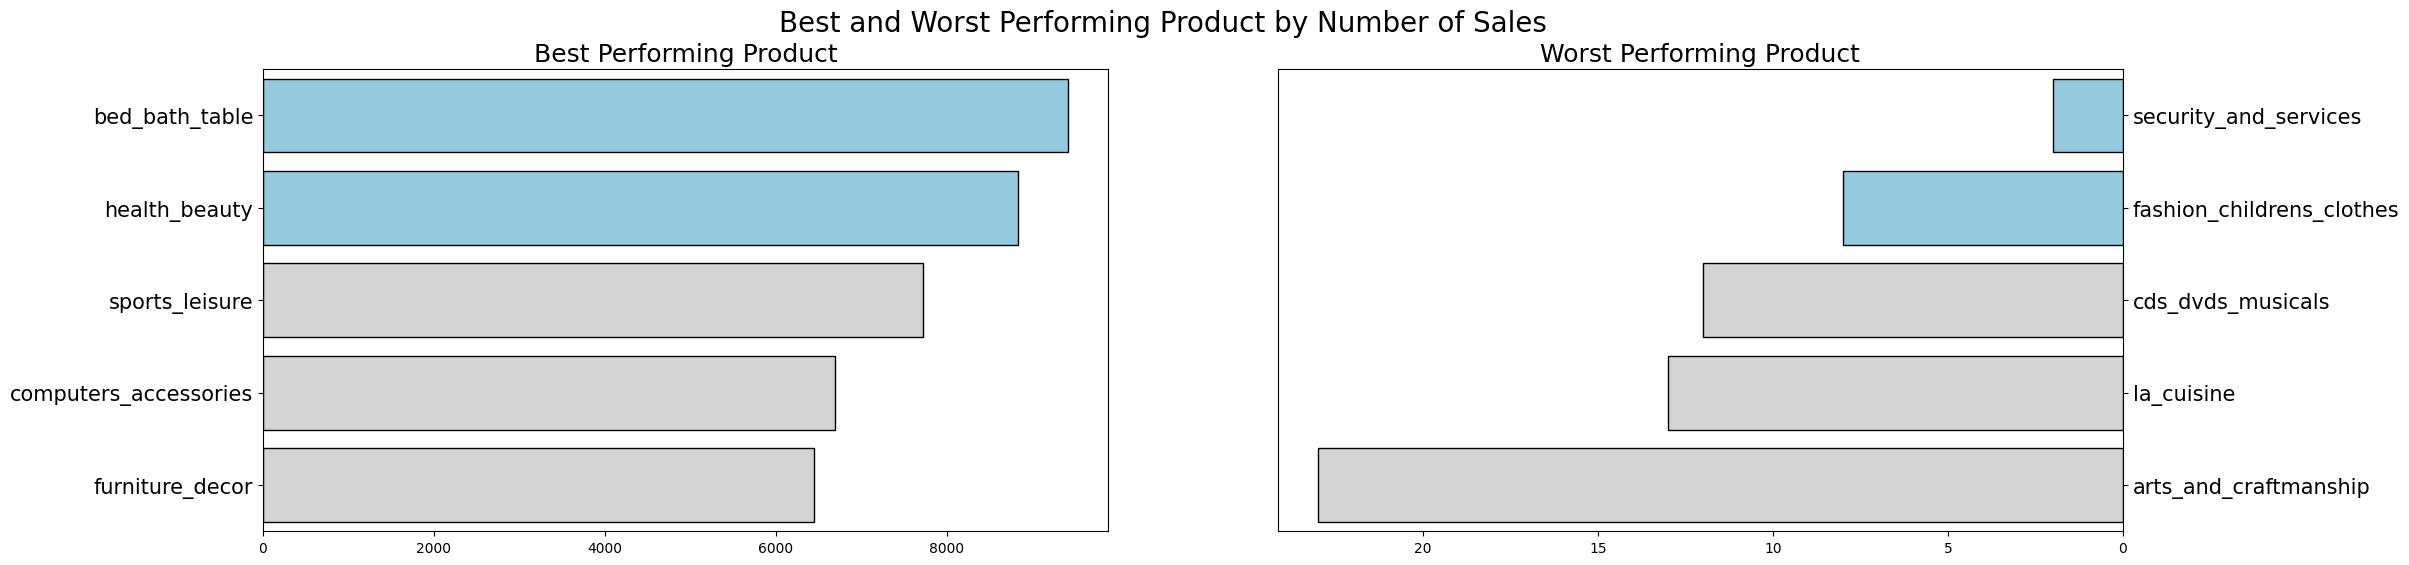

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["skyblue", "skyblue", "lightgray", "lightgray", "lightgray"]

sns.barplot(
    x="sales_volume",
    y="product_category_name", 
    hue="product_category_name", 
    data=category_sales.head(5), 
    palette=colors, 
    edgecolor="black", 
    ax=ax[0],
    legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(
    x="sales_volume", 
    y="product_category_name", 
    hue="product_category_name", 
    data=category_sales.sort_values(by="sales_volume", ascending=True).head(5), 
    palette=colors, 
    edgecolor="black", 
    ax=ax[1],
    legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


### Pertanyaan 3 : Bagaimana distribusi geografis pelanggan dari platform e-commerce ini, dan wilayah mana yang mencatat volume penjualan paling tinggi ?

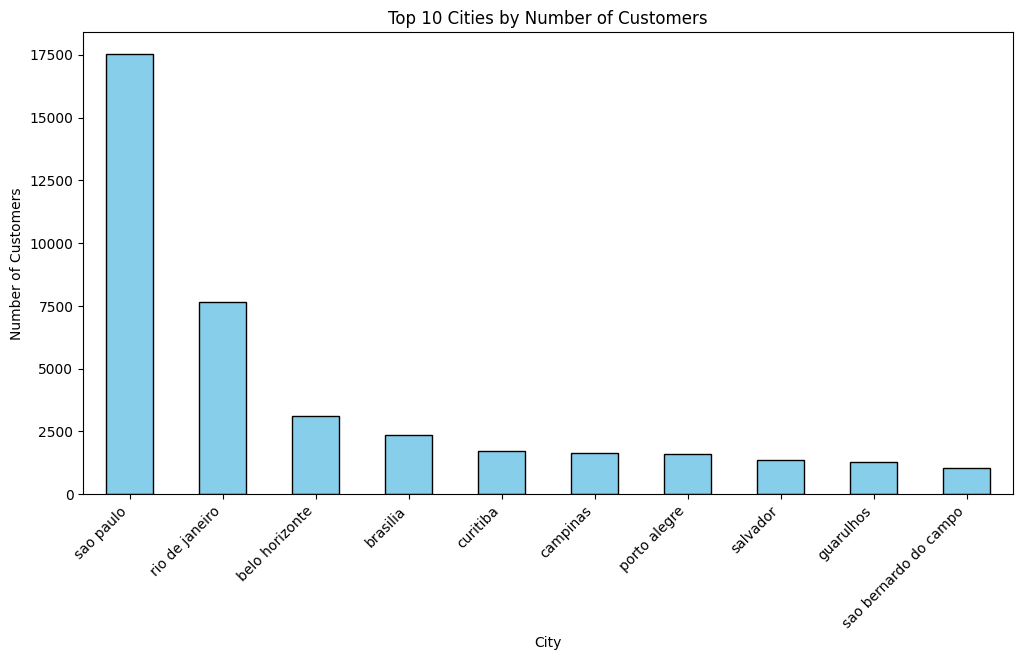

In [179]:
# Menampilkan kota dengan customer terbanyak
city_counts = all_data['customer_city'].value_counts()

# Menampilkan 10 kota teratas
top_cities = city_counts.head(10)

# Membuat bar chart
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='skyblue', edgecolor="black")
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

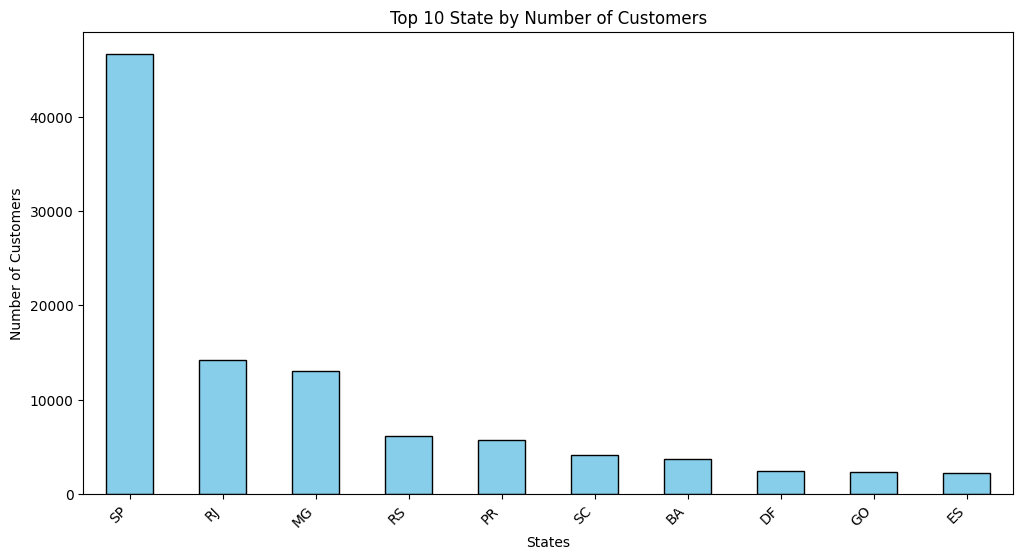

In [180]:
# Menampilkan negara bagian dengan jumlah customer terbanyak
states_counts = all_data['customer_state'].value_counts()

# Menampilkan 10 kota teratas
top_states = states_counts.head(10)

# Membuat bar chart
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', color='skyblue', edgecolor="black")
plt.title('Top 10 State by Number of Customers')
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

Tiga kota dengan jumlah konsumen terbanyak berada di tiga negara bagian dengan jumlah konsumen terbanyak pula. Hal ini terjadi karena negara bagian di wilayah selatan Brasil, seperti São Paulo, Rio de Janeiro, dan Minas Gerais, memang memiliki populasi yang besar dan kawasan perkotaan yang padat.

## Analisis Lanjutan Profiling Customer Menggunakan Model RFM 

### Pertanyaan 4: Bagaimana profil karakteristik dari customer e-commerce berdasarkan variabel *recency, frequency, dan monetary* ? Kemudian bagaimana strategi yang sesuai bagi e-commerce tersebut ?

- Customer Profiling adalah suatu proses pengelompokan pelanggan berdasarkan kesamaan karakteristik yang dimilikinya [1].

- Model RFM merupakan metode clustering yang didasarkan pada tiga variabel yaitu Recency, Frequency, Monetary (RFM). Variabel-variabel tersebut meliputi Recency (rentang terakhir kali transaksi dilakukan), Frequency (jumlah transaksi dalam satu periode), dan Monetary (nilai uang yang dikeluarkan pelanggan selama transaksi). Semakin kecil rentang Recency, semakin banyak Frequency, dan semakin besar Monetary, maka skor R, F, dan M juga semakin besar [1].

Untuk melakukan profiling customer menggunakan metode RFM dilakukan dalam dua tahapan, meliputi :
1. Menentukan nilai Recency, Frequency, dan Monetary dari masing masing customer.
2. Mengkonversi nilai Recency, Frequency, dan Monetary menjadi nilai RFM.
3. Profiling customer kedalam lima segmentasi.

In [181]:
# Hitung nilai dari Recency, Frequency, dan Monetary
current_date = all_data['order_purchase_timestamp'].max()  # last date
rfm_data = all_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Ubah nama kolom
rfm_data.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Menampilkan tabel
print("Customer terakhir yang aktif melakukan transaksi")
display(rfm_data.sort_values(by='recency', ascending = True).head())

print("\nFrekuensi pembelian customer")
display(rfm_data.sort_values(by='frequency', ascending = False).head())

print("\nTotal nilai transaksi customer")
display(rfm_data.sort_values(by="monetary", ascending = False).head())

Customer terakhir yang aktif melakukan transaksi


,customer_id,recency,frequency,monetary
41385,6e353700bc7bcdf6ebc15d6de16d7002,0,1,45.90
6220,10a79ef2783cae3d8d678e85fde235ac,0,1,6.90
31668,54365416b7ef5599f54a6c7821d5d290,0,1,99.00
27635,496630b6740bcca28fce9ba50d8a26ef,0,1,24.90
25785,448945bc713d98b6726e82eda6249b9e,0,5,457.75



Frekuensi pembelian customer


,customer_id,recency,frequency,monetary
71933,be1c4e52bb71e0c54b11a26b8e8d59f2,316,22,1430.16
95070,fc3d1daec319d62d49bfb5e1f83123e9,409,21,31.80
71932,be1b70680b9f9694d8c70f41fa3dc92b,188,20,2000.00
71682,bd5d39761aa56689a265d95d8d32b8be,371,20,1974.00
65617,adb32467ecc74b53576d9d13a5a55891,576,15,765.00



Total nilai transaksi customer


,customer_id,recency,frequency,monetary
8293,1617b1357756262bfa56ab541c47bc16,334,8,13440.0
89276,ec5b2ba62e574342386871631fafd3fc,45,4,7160.0
75240,c6e2731c5b391845f6800c97401a43a9,563,1,6735.0
92311,f48d464a0baaea338cb25f816991ab1f,35,1,6729.0
24068,3fd6777bbce08a352fddd04e4a7cc8f6,462,1,6499.0


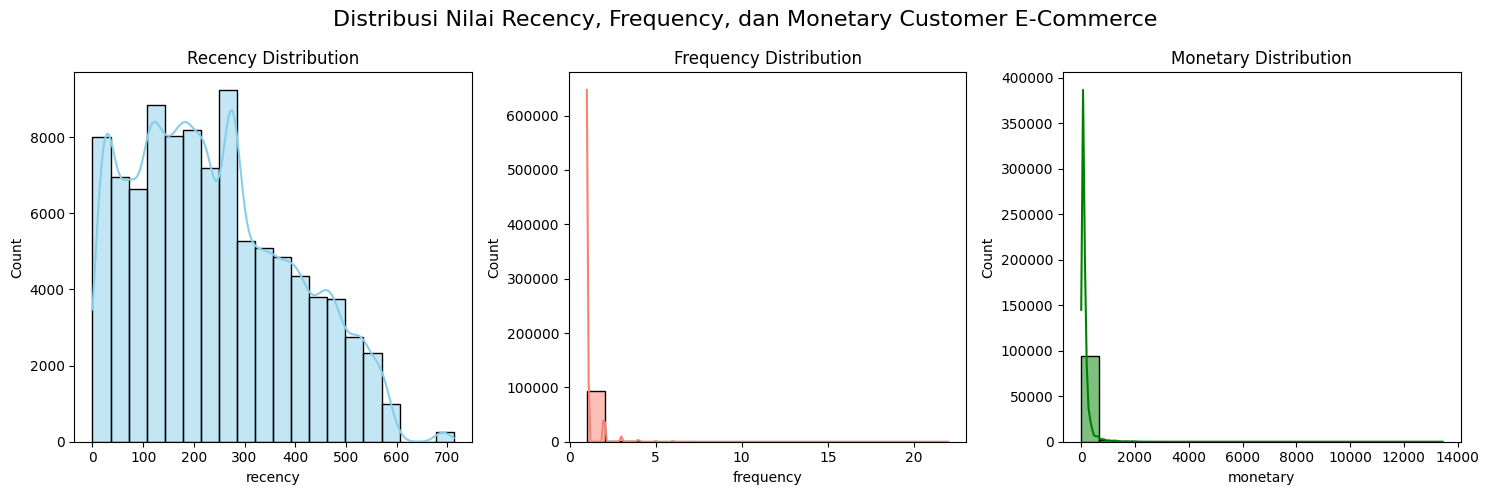

In [182]:
# Visualisasi analisis RFM
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Recency
sns.histplot(rfm_data['recency'], bins=20, kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Recency Distribution')

# Plot Frequency
sns.histplot(rfm_data['frequency'], bins=20, kde=True, color='salmon', ax=axs[1])
axs[1].set_title('Frequency Distribution')

# Plot Monetary
sns.histplot(rfm_data['monetary'], bins=20, kde=True, color='green', ax=axs[2])
axs[2].set_title('Monetary Distribution')

fig.suptitle('Distribusi Nilai Recency, Frequency, dan Monetary Customer E-Commerce', fontsize=16)
plt.tight_layout()
plt.show()

Berdasarkan hasil histogram diatas terlihat bahwa nilai dari Recency, Frequency, dan Monetary terdistribusi cenderung pada nilai yang rendah. Kemudian kelompokkan customer kedalam segmentasi berikut :
1. Jika RFM_score lebih dari 4.5, pelanggan diklasifikasikan sebagai "Top customers".  Mencakup pelanggan yang baru-baru ini melakukan transaksi, sering bertransaksi, dan memberikan nilai transaksi yang tinggi.

2. Jika RFM_score antara 4 dan 4.5, pelanggan diklasifikasikan sebagai "High value customer". Mencakup pelanggan yang memiliki nilai transaksi tinggi, meskipun mungkin tidak sering bertransaksi.

3. Jika RFM_score antara 3 dan 4, pelanggan diklasifikasikan sebagai "Medium value customer". Mencakup pelanggan dengan kombinasi baik dalam frekuensi dan nilai transaksi, meskipun mungkin belum terlalu baru dalam bertransaksi.

4. Jika RFM_score antara 1.6 dan 3, pelanggan diklasifikasikan sebagai "Low value customers". Mencakup pelanggan yang melakukan transaksi dengan frekuensi dan nilai yang lebih rendah.

5. Jika RFM_score kurang dari 1.6, pelanggan diklasifikasikan sebagai "Lost customers". Mencakup pelanggan yang tidak melakukan transaksi baru-baru ini dan memiliki frekuensi dan nilai transaksi yang rendah.

In [183]:
# Melakukan customer profiling berdasarkan recency, frequency, & monetary score 
# Mengurutkan customer berdasarkan recency, frequency, & monetary score
rfm_data['r_rank'] = rfm_data['recency'].rank(ascending=False)
rfm_data['f_rank'] = rfm_data['frequency'].rank(ascending=True)
rfm_data['m_rank'] = rfm_data['monetary'].rank(ascending=True)

# Menormalisasi ranking customers
rfm_data['r_rank_norm'] = (rfm_data['r_rank']/rfm_data['r_rank'].max())*100
rfm_data['f_rank_norm'] = (rfm_data['f_rank']/rfm_data['f_rank'].max())*100
rfm_data['m_rank_norm'] = (rfm_data['m_rank']/rfm_data['m_rank'].max())*100
 
rfm_data.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

# Menentukan skor rfm customer
rfm_data['RFM_score'] = 0.15*rfm_data['r_rank_norm']+0.28 * \
    rfm_data['f_rank_norm']+0.57*rfm_data['m_rank_norm']
rfm_data['RFM_score'] *= 0.05
rfm_data = rfm_data.round(2)
rfm_data[['customer_id', 'RFM_score']].head(7)

# Segmentasi customer berdasarkan RFM_score
rfm_data["customer_segment"] = np.where(
    rfm_data['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_data['RFM_score'] > 4, "High value customers",(np.where(
            rfm_data['RFM_score'] > 3, "Medium value customers", np.where(
                rfm_data['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_data[['customer_id', 'RFM_score', 'customer_segment']].head(10)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.34,Low value customers
1,000161a058600d5901f007fab4c27140,1.65,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,2.96,Low value customers
3,0002414f95344307404f0ace7a26f1d5,2.91,Low value customers
4,000379cdec625522490c315e70c7a9fb,2.66,Low value customers
5,0004164d20a9e969af783496f3408652,1.74,Low value customers
6,000419c5494106c306a97b5635748086,1.55,lost customers
7,00046a560d407e99b969756e0b10f282,2.85,Low value customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.03,Low value customers
9,000598caf2ef4117407665ac33275130,4.18,High value customers


In [184]:
# Membuat pivot table jumlah tiap segmentasi customer
customer_segment_data = rfm_data.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_data

,customer_segment,customer_id
0,High value customers,3573
1,Low value customers,45307
2,Medium value customers,27270
3,Top customers,841
4,lost customers,19487


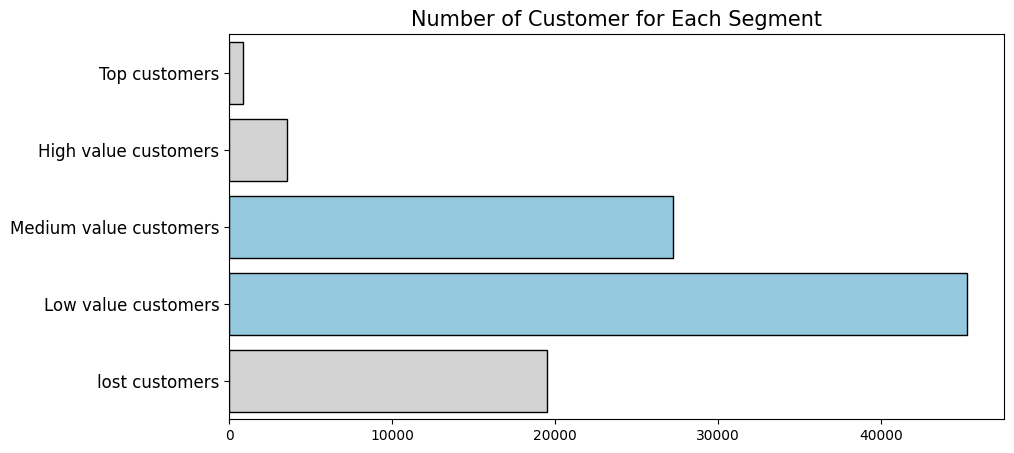

In [185]:
# Membuat visualisasi barplot jumlah segmentasi customer
customer_segment_data['customer_segment'] = pd.Categorical(customer_segment_data['customer_segment'], [
    "Top customers",
    "High value customers", 
    "Medium value customers",
    "Low value customers",
    "lost customers"
])

plt.figure(figsize=(10, 5))
colors_ = ["lightgray", "lightgray", "skyblue", "skyblue", "lightgray"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    hue="customer_segment",
    data=customer_segment_data.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    edgecolor="black"
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Profil customer paling banyak merupakan customer low value customers dan medium value customers 

## Conclusion

**1. Conclution pertanyaan 1 :** Bagaimana performa penjualan dari e-commerce tiap bulannya berdasarkan volume dan nilai penjualan ?
>Merujuk pada hasil line chart baik dalam sales volume dan sales value menunjukkan performa penjualan e-commerce sejak tahun 2017 hingga tahun 2016-09 hingga 2018-08 berada pada tren positif. Akan tetapi, dalam tiga bulan terakhir, nilai dari sales value menunjukkan adanya penurunan yang cukup signifikan dibandingkan bulan bulan sebelumnya.

**2. conclution pertanyaan 2 :** Kategori produk apakah yang memiliki volume penjualan paling tinggi dan paling rendah ?
>Kategori produk dengan performa penjualan paling tinggi antara lain bed_bath_table, health_beauty, sports_leisure, computers_accessories, furniture_decor. Sedangkan kategori dengan volume penjualan terendah meliputi security_and_services, 
fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, arts_and_craftmanship.

**3. conclution pertanyaan 3 :** Bagaimana distribusi geografis pelanggan dari platform e-commerce ini, dan wilayah mana yang mencatat volume penjualan paling tinggi ?
>Penduduk Brasil memiliki kecenderungan terkonsentrasi di wilayah pesisir timur Brazil. Sebagian besar kota-kota besar dan pusat kegiatan ekonomi dan budaya Brasil terletak di sepanjang pesisir timur, terutama di wilayah pesisir Atlantik. Wilayah ini termasuk kota-kota seperti Rio de Janeiro, São Paulo, Salvador, dan Minas Gerais. Sehingga dilihat dari distribusi persebaran pelanggan memang paling banyak terkonsentrasi pada tiga negara Rio de Janeiro, São Paulo, dan Minas Gerais 

**4. conclution pertanyaan 4 :** Bagaimana profil karakteristik dari customer e-commerce berdasarkan variabel *recency, frequency, dan monetary* ? Kemudian bagaimana strategi yang sesuai bagi e-commerce tersebut ?
Merujuk pada hasil analisis lanjutan profiling customer menggunakan RFM analisis diperoleh beberapa hasil sebagai berikut :
- Distribusi recency yang condong ke kiri menunjukkan kondisi sebagian besar customer baru-baru ini melakukan transaksi.
- Distribusi frequency dengan mean rendah dan skewness yang tinggi menunjukkan kondisi sebagian besar pelanggan hanya melakukan sedikit transaksi.
- Distribusi monetary menunjukkan bahwa sebagian besar transaksi memiliki nilai yang relatif rendah. Kondisi ini terjadi karena sebagian besar transaksi memiliki harga yang lebih rendah daripada harga rata-rata, dan terdapat sejumlah transaksi dengan nilai yang signifikan di atas rata-rata.
- Jenis customers e-commerce paling banyak merupakan low dan medium value customers. Hal ini menunjukkan bahwa sebagian besar pelanggan cenderung memiliki nilai transaksi yang rendah atau memiliki kombinasi nilai dan frekuensi transaksi yang belum begitu tinggi.

**Saran kebijakan berdasarkan RFM** 
>Perusahaan e-commerce dapat mempertimbangkan berbagai strategi untuk meningkatkan nilai dan frekuensi transaksi dari segmen pelanggan low dan medium value customers. Perusahaan dapat melakukan campaign dengan memberikan program insentif berupa cashback atau voucer, penawaran khusus, atau membuat media promosi yang dapat merangsang pelanggan untuk melakukan lebih banyak transaksi.

## Daftar Pustaka

[1]	Luh Putu Wiwien Widhyastuti, I. N. Sukajaya, and Kadek Yota Ernanda Aryanto, “The Customer Profiling berdasarkan Model
    RFM dengan Metode K-Means pada Institusi Pendidikan untuk menunjang Strategi Bisnis di Masa Pandemi Covid-19,” JTIM  J. Teknol. Inf. dan Multimed., vol. 4, no. 2, pp. 94–108, Aug. 2022.

